# Bachelorthesis
## Machine Learning

In [4]:
import pandas as pd
import scipy

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,classification_report,roc_auc_score
from _thread import start_new_thread
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                         numbers=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    if(numbers):
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## One Hot Encodet
Im folgeden wird der Datensatz One Hot Encodet Geladen und ausgewertet

In [6]:
features_One_Hot = scipy.sparse.load_npz('data/DataOneHot/OneHotEncodetFeature.npz')
print(features_One_Hot.shape)
targets = pd.read_pickle('data/DataOneHot/OneHotEncodetTargets.p')
print(targets.shape)

(95620, 3878)
(95620, 6)


In [7]:
targets.head(5)

,partner_nr,e_1,e_2_hierarchisch,e_3_hierarchisch,e_4_hierarchisch,e_5_hierarchisch
0,0000dce02bc7a4ac9d66d463772ed976,C,C.23,C.23.7,C.23.7.70,C.23.7.70.0
1,00022b6595727f590b36e008c0bf4cf5,K,K.66,K.66.2,K.66.2.29,K.66.2.29.0
2,00033ce81931041312d2772a74cb389f,G,G.47,G.47.2,G.47.2.29,G.47.2.29.0
6,0003df3379e511bf97b8fbf92f7753e1,I,I.56,I.56.3,I.56.3.30,I.56.3.30.3
7,0003f1730b1f27bc05e53c72736c2a0a,G,G.46,G.46.7,G.46.7.75,G.46.7.75.0


In [5]:
features_One_Hot

<95620x3878 sparse matrix of type '<class 'numpy.int32'>'
	with 368071 stored elements in Compressed Sparse Row format>

In [10]:
target=targets['e_1']

Bei einer untersuchung der Klassenhäufigkeit zeigt sich das einige Klassen überdurchnittlich häuif vorkommen und andere extrem selten sind. Daher wird dem zu trainierenden Modell der Parameter class_weight mitgegeben um dieser ungleichverteilung rechnung zu tragen.

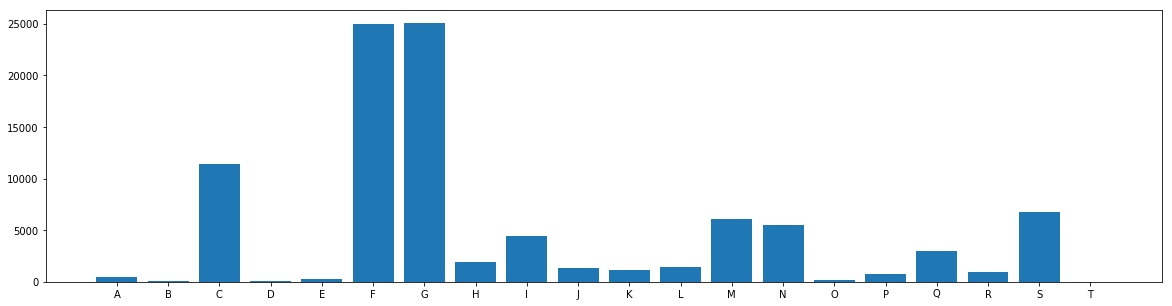

In [23]:
d = {}
for l in target:
    if l in d:
        d[l]+=1
    else:
        d[l] = 1
plt.figure(figsize=(20,5))
x = list(d.keys())
y = list(d.values())
x_int=LabelEncoder().fit_transform(x)
plt.bar(x_int,y,tick_label =x)
plt.show()

In [24]:
from random import shuffle
import random
random.seed(500)
target_shuffel = list(target.copy())
shuffle(target_shuffel)

In [25]:
estimator=LinearSVC(
    max_iter =5000,
    class_weight = 'balanced'
)

In [13]:
features_=features_One_Hot

Im folgenden wird jeweils ein Modell auf den echten Daten und ein Modell auf Daten deren Zielvriable gemischt wurde gemacht. Das Ziel soll sein ein GroundZero zu definieren und zu überprüfen das die Daten konsitent sind. Sollten die "echten" Daten nicht viel besser durch ein Modell abgebildet werden als die zufälligen kann davon ausgegangen werden das es keine Struktur in den Daten gibt.</br>

Es zeigt sich das der Score zwischen gemischt und echt nur geringfügig abweicht. Das lässtsich auf die starke ungleichverteilung der Klasse zurückführen. Wenn das Modell einfach alles in die Kategorie F oder G steckt wird ein einigermaßen guter Score erreicht. 
In der gegenüberstellung der Confusion Matrixen zeigt sich allerding deutlich das aus den zufälligen Daten keine Struktur abgeleitet werden konnte. Wohingegen die echten Daten eine deutliche Diagonale erkenne lassen.


In [27]:
estimator.fit(features_,target)
targets_pred = estimator.predict(features_)
cnf_matrix_notShuffeld = confusion_matrix(target,targets_pred)
print('Not shuffeled score',estimator.score(features_,target))
print('Not shuffeled balanced score',balanced_accuracy_score(target,estimator.predict(features_)))
#plt.figure(figsize=(10,10))
#plot_confusion_matrix(cnf_matrix_notShuffeld, classes=sorted(set(target)),
#                      title='Not shuffeled',normalize=False,numbers=True)
#plt.figure(figsize=(10,10))
#plot_confusion_matrix(cnf_matrix_notShuffeld, classes=sorted(set(target)),
#                      title='Not shuffeled norm',normalize=True,numbers=True)

estimator.fit(features_,target_shuffel)
targets_shuffel_pred = estimator.predict(features_)
cnf_matrix_shuffeld = confusion_matrix(target,targets_shuffel_pred)
print('Shuffeld score', estimator.score(features_,target_shuffel))
print('Shuffeled balanced score',balanced_accuracy_score(target_shuffel,estimator.predict(features_)))
#plt.figure(figsize=(10,10))
#plot_confusion_matrix(cnf_matrix_shuffeld, classes=sorted(set(target)),
#                      title='Normalized_shuffeld',normalize=True,numbers=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Not shuffeled score 0.17304957121941017
Not shuffeled balanced score 0.2541045080329856
Shuffeld score 0.17686676427525622
Shuffeled balanced score 0.2764149311154556


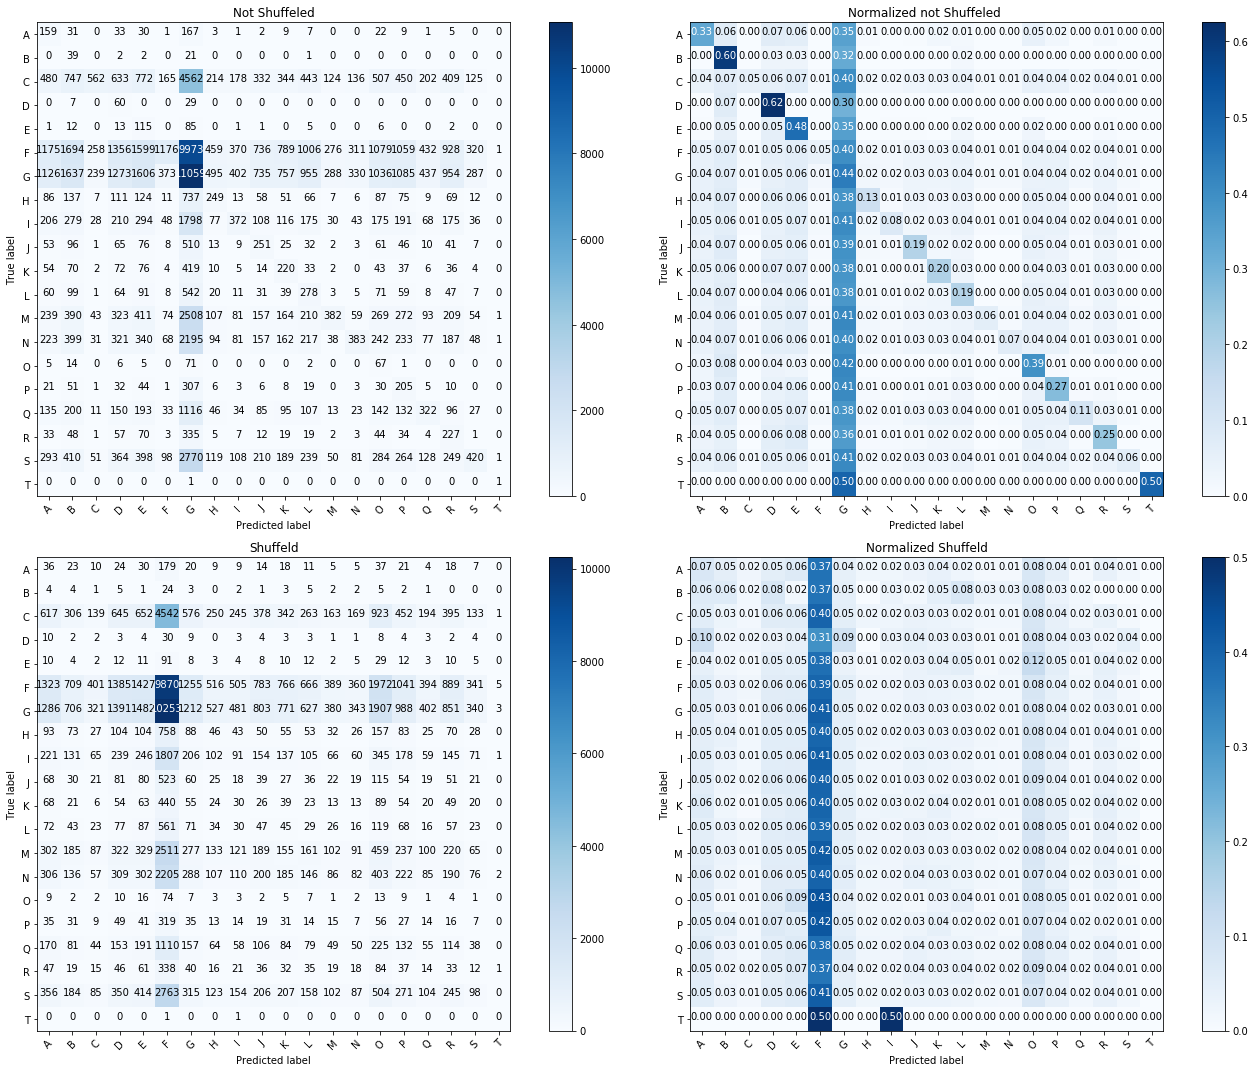

In [31]:
figure_1 = plt.figure(1, figsize=(20, 15))

figure_1.add_subplot(221)
plot_confusion_matrix(cnf_matrix_notShuffeld, classes=sorted(set(target)),
                      title='Not Shuffeled',normalize=False,numbers=True)
figure_1.add_subplot(222)
plot_confusion_matrix(cnf_matrix_notShuffeld, classes=sorted(set(target)),
                      title='Normalized not Shuffeled ',normalize=True,numbers=True)
figure_1.add_subplot(223)
#plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix_shuffeld, classes=sorted(set(target)),
                      title='Shuffeld',normalize=False,numbers=True)
figure_1.add_subplot(224)
#plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix_shuffeld, classes=sorted(set(target)),
                      title='Normalized Shuffeld',normalize=True,numbers=True)

plt.show()

In [32]:
#estimator.fit(X_train,y_train)
def roc_Area_uc(estimator,X_test,y_test,f):
    if type(estimator).__name__ in ['MLPClassifier','DecisionTreeClassifier']:
        roc_auc = []
        y_prob= estimator.predict_proba(X_test) 
        for ix,lable in enumerate(estimator.classes_):
            try:
                y_single = [x == lable for x in y_test]
                x=ix+1
                y_pred_single=y_prob[:,0 if x==0 else x-1:x:].reshape((1,-1))[0]
                roc_auc.append(roc_auc_score(y_single,y_pred_single))
                print(lable+': ',roc_auc[-1],file=f )
            except ValueError :
                print('OK if value only exist one time pass')
        print('Unbalaced Roc_AUC Mean ',sum(roc_auc)/len(roc_auc),file=f)

In [38]:
def test_dataset(X_train, X_test, y_train, y_test,estimator,filename):
    
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    
    with open(filename+'.txt','w') as f:
        print(estimator,file=f)
        # Balanced Accuracy
        print('balanced_accuracy_score: ',balanced_accuracy_score(y_test,y_pred),file=f)
        #print classifikation report
        print('classification_report',file=f)
        print(classification_report(y_test,y_pred),file=f)
        #print auc
        roc_Area_uc(estimator,X_test,y_test,f)
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(20, 15))
    plot_confusion_matrix(cm, classes=sorted(set(y_pred )),
                              normalize=False,
                              title=filename+' Confusion matrix',
                              cmap=plt.cm.Blues,
                             numbers=True)
    plt.savefig(filename+'.jpg')
    plt.figure(figsize=(20, 15))
    plot_confusion_matrix(cm, classes=sorted(set(y_pred )),
                              normalize=True,
                              title=filename+' Confusion matrix',
                              cmap=plt.cm.Blues,
                             numbers=True)
    plt.savefig(filename+'_norm.jpg')
    print(filename+'Done')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features_,target)

In [42]:
estimators = [LinearSVC(class_weight = 'balanced'),
              MLPClassifier(),
              DecisionTreeClassifier(class_weight = 'balanced')]

for est in estimators:
    filename= 'results/{}_OneHot_e1'.format(type(est).__name__)
    #test_dataset(X_train, X_test, y_train, y_test,est,filename)
    start_new_thread ( test_dataset, (X_train, X_test, y_train, y_test,est,filename,) )
print('Start all Modells on One Hot Dataset')

Start all Modells on One Hot Dataset
results/DecisionTreeClassifier_OneHot_e1Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


results/LinearSVC_OneHot_e1Done


### Latente Brachen Repräsentationen

In [8]:
target_vec=np.load('data/DataTargetLatent/target_vec_dim10.npy')
print(target_vec.shape)
target_vec

(95620, 10)


array([[-2.04721546,  3.1477356 , -3.16860056, ..., -3.77380586,
        -1.47807026, -4.75493193],
       [ 6.23261547, -5.52615833, -1.86873984, ..., -0.47219887,
         3.61372566,  1.47227168],
       [ 5.21182585,  0.67662579, -2.04775   , ..., -3.72838664,
         3.13602638, -2.43386507],
       ...,
       [ 3.82824326, -0.22485398, -2.27041626, ..., -5.47510147,
         1.28619969, -2.14893389],
       [ 1.52038133, -0.37973535,  4.76967669, ...,  0.42449063,
        -0.1589561 ,  1.03078139],
       [-3.86802006, -0.07109435,  2.9719913 , ..., -1.32489359,
        -2.08959293,  0.40814048]])

In [11]:
target_vec_=np.concatenate([target.reshape(-1,1),target_vec],axis=1)
target_vec_.shape

C:\Users\lasse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(95620, 11)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_,target_vec_)

In [15]:
estimator_NN=MLPRegressor(
    solver='lbfgs', # smallDatset
    activation='identity',
    learning_rate = 'adaptive',
    verbose=True,
batch_size =50)

In [16]:
estimator_NN.fit(X_train,y_train[:,1:])
estimator_NN.score(X_test,y_test[:,1:])

-0.023310564182575558

In [17]:
X_train=estimator_NN.predict(X_train)
X_test=estimator_NN.predict(X_test)
y_train = y_train[:,0:1].reshape((1,-1))[0]
y_test = y_test[:,0:1].reshape((1,-1))[0]

In [49]:
for est in estimators:
    filename= 'results/{}_LatentWZ_e1'.format(type(est).__name__)
    #test_dataset(X_train, X_test, y_train, y_test,est,filename)
    start_new_thread ( test_dataset, (X_train, X_test, y_train, y_test,est,filename,) )
    break;
print('Start all Modells on Latente Branche')

Start all Modells on Latente Branche


In [18]:
estimator =estimator=LinearSVC(
    max_iter =5000,
    class_weight = 'balanced'
)

In [19]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.050586294644982606
0.08252176431985397


In [20]:
print(classification_report(y_test,estimator.predict(X_test)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           A       0.01      0.01      0.01       113
           B       0.00      0.00      0.00        22
           C       0.10      0.01      0.02      2828
           D       0.00      0.00      0.00        23
           E       0.00      0.09      0.01        54
           F       0.27      0.17      0.21      6229
           G       0.26      0.50      0.34      6207
           H       0.02      0.01      0.02       482
           I       0.09      0.01      0.02      1149
           J       0.01      0.01      0.01       321
           K       0.01      0.02      0.02       272
           L       0.02      0.04      0.03       382
           M       0.11      0.01      0.02      1559
           N       0.06      0.01      0.01      1344
           O       0.00      0.00      0.00        39
           P       0.00      0.01      0.01       183
           Q       0.01      0.01      0.01       748
           R       0.01    

In [21]:
estimator = MLPClassifier(max_iter =500)

In [22]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

0.05299001539155308
0.06276652044929434


In [23]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       113
           B       0.00      0.00      0.00        22
           C       0.11      0.01      0.01      2828
           D       0.00      0.00      0.00        23
           E       0.00      0.00      0.00        54
           F       0.26      0.36      0.30      6229
           G       0.26      0.63      0.37      6207
           H       0.00      0.00      0.00       482
           I       0.00      0.00      0.00      1149
           J       0.00      0.00      0.00       321
           K       0.00      0.00      0.00       272
           L       0.00      0.00      0.00       382
           M       0.03      0.00      0.00      1559
           N       0.14      0.00      0.01      1344
           O       0.00      0.00      0.00        39
           P       0.00      0.00      0.00       183
           Q       0.00      0.00      0.00       748
           R       0.00    

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
estimator = DecisionTreeClassifier()

In [25]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

0.052492340446951724
0.1883847704811773


In [26]:
print(classification_report(y_test,estimator.predict(X_test)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       113
           B       0.00      0.00      0.00        22
           C       0.11      0.04      0.06      2828
           D       0.00      0.00      0.00        23
           E       0.00      0.00      0.00        54
           F       0.26      0.29      0.28      6229
           G       0.26      0.61      0.36      6207
           H       0.01      0.00      0.00       482
           I       0.04      0.01      0.01      1149
           J       0.00      0.00      0.00       321
           K       0.00      0.00      0.00       272
           L       0.02      0.00      0.00       382
           M       0.06      0.01      0.02      1559
           N       0.07      0.01      0.02      1344
           O       0.00      0.00      0.00        39
           P       0.00      0.00      0.00       183
           Q       0.03      0.00      0.01       748
           R       0.02    

## Partner Embedding

In [27]:
features_oneHot_withemb = scipy.sparse.load_npz('data/DataPartnerEmbed/feature_oneHot_withemb.npz')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_oneHot_withemb,target)

In [52]:
for est in estimators:
    filename= 'results/{}_LatentPartner_e1'.format(type(est).__name__)
    #test_dataset(X_train, X_test, y_train, y_test,est,filename)
    start_new_thread ( test_dataset, (X_train, X_test, y_train, y_test,est,filename,) )
    break;
print('Start all Modells on Latente Partner')

Start all Modells on Latente Partner


In [29]:
estimator =estimator=LinearSVC(
    max_iter =5000,
    class_weight = 'balanced'
)

In [30]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.05586921883754009
0.33256775920413517


In [31]:
print(classification_report(y_test,estimator.predict(X_test)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           A       0.00      0.04      0.01       114
           B       0.00      0.00      0.00        13
           C       0.14      0.03      0.05      2853
           D       0.00      0.14      0.00        21
           E       0.00      0.07      0.00        59
           F       0.29      0.10      0.15      6220
           G       0.28      0.09      0.14      6328
           H       0.02      0.02      0.02       479
           I       0.07      0.27      0.11      1105
           J       0.01      0.03      0.02       372
           K       0.01      0.03      0.02       280
           L       0.01      0.03      0.02       369
           M       0.06      0.01      0.02      1436
           N       0.07      0.02      0.03      1347
           O       0.00      0.02      0.00        43
           P       0.01      0.06      0.02       193
           Q       0.04      0.03      0.04       720
           R       0.01    

In [32]:
estimator = MLPClassifier(max_iter =500)

In [33]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.05165637718385105
0.27895220485632827


In [34]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       114
           B       0.00      0.00      0.00        13
           C       0.12      0.08      0.10      2853
           D       0.00      0.00      0.00        21
           E       0.00      0.00      0.00        59
           F       0.26      0.56      0.35      6220
           G       0.27      0.26      0.26      6328
           H       0.02      0.00      0.01       479
           I       0.05      0.01      0.02      1105
           J       0.00      0.00      0.00       372
           K       0.00      0.00      0.00       280
           L       0.02      0.01      0.01       369
           M       0.04      0.02      0.03      1436
           N       0.05      0.02      0.03      1347
           O       0.00      0.00      0.00        43
           P       0.00      0.00      0.00       193
           Q       0.04      0.01      0.02       720
           R       0.00    

C:\Users\lasse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
estimator = DecisionTreeClassifier()

In [36]:
estimator.fit(X_train,y_train)
print(balanced_accuracy_score(y_test,estimator.predict(X_test)))
print(balanced_accuracy_score(y_train,estimator.predict(X_train)))

0.0519839764677022
0.6614111383493424


In [37]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       114
           B       0.00      0.00      0.00        13
           C       0.15      0.13      0.14      2853
           D       0.00      0.00      0.00        21
           E       0.00      0.00      0.00        59
           F       0.26      0.27      0.27      6220
           G       0.26      0.40      0.31      6328
           H       0.02      0.01      0.02       479
           I       0.04      0.02      0.03      1105
           J       0.02      0.01      0.01       372
           K       0.01      0.00      0.00       280
           L       0.01      0.01      0.01       369
           M       0.06      0.05      0.05      1436
           N       0.05      0.03      0.04      1347
           O       0.00      0.00      0.00        43
           P       0.01      0.01      0.01       193
           Q       0.03      0.03      0.03       720
           R       0.00    